In [1]:
import numpy as np

In [2]:
import pandas as pd

df = pd.read_csv(r'Bank_Personal_Loan_Modelling.csv')


In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage   
0   1   25           1      49     91107       4    1.6          1         0  \
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [5]:

df=df.drop(['ID'],axis=1)


{'whiskers': [<matplotlib.lines.Line2D at 0x23a3187bbd0>,
 'caps': [<matplotlib.lines.Line2D at 0x23a31b15590>,
 'boxes': [<matplotlib.lines.Line2D at 0x23a31b02d50>],
 'medians': [<matplotlib.lines.Line2D at 0x23a31b16ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23a31b17890>],
 'means': []}

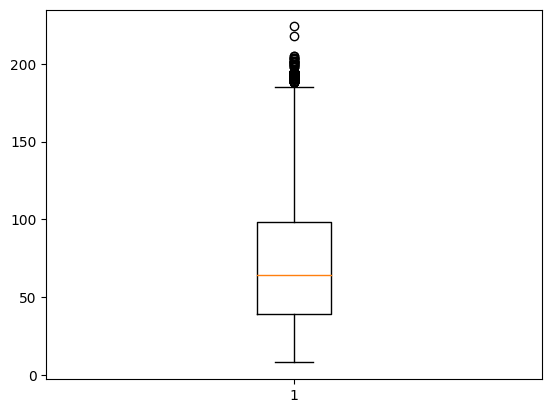

In [6]:

import matplotlib.pyplot as plt

plt.boxplot(df['Income'])


{'whiskers': [<matplotlib.lines.Line2D at 0x23a31b8dfd0>,
 'caps': [<matplotlib.lines.Line2D at 0x23a31b8f710>,
 'boxes': [<matplotlib.lines.Line2D at 0x23a31b8d3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x23a31bb0e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x23a31b8f350>],
 'means': []}

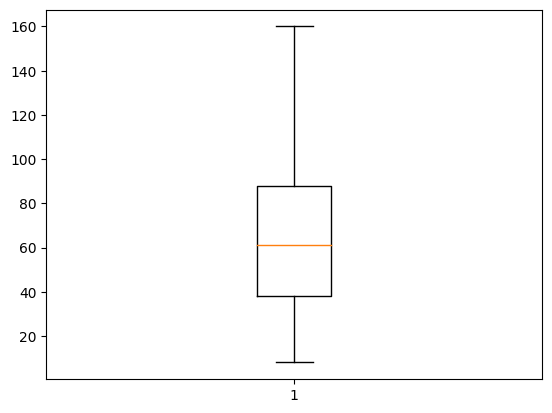

In [7]:

inc_index = df[df['Income']>160].index

df = df.drop(inc_index)

plt.boxplot(df['Income'])


In [8]:


df_input = df.drop(['Personal Loan'],axis=1)

df_input.columns


Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

In [9]:

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(df_input.values,df['Personal Loan'].values,test_size=0.25,random_state=46,stratify=df['Personal Loan'])

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

X_train.shape


(3498, 12)

In [10]:
import tensorflow as tf

model = tf.keras.models.Sequential([tf.keras.layers.Dense(12, activation='relu',name='firstlayer'),
  tf.keras.layers.Dense(1,activation='sigmoid',name='secondlayer')])


In [11]:

output = model(X_train)


In [12]:

from sklearn.preprocessing import LabelEncoder

lc = LabelEncoder()

ini_pred  =lc.fit_transform(output.numpy().flatten()>0.5) 

from sklearn.metrics import accuracy_score

accuracy_score(Y_train,ini_pred)


0.8281875357347055

In [13]:
type(model.layers[0].get_weights())
#model.set_weights([weights])

list

In [14]:
model.layers[0].get_weights()[0]

array([[-0.36845136,  0.14877105, -0.12290835,  0.20590103, -0.3178556 ,
        -0.3348502 , -0.20529139,  0.12881863,  0.22251737, -0.3950386 ,
        -0.24951112, -0.18085182],
       [-0.09731412,  0.13055503,  0.37441146, -0.32465184,  0.17626715,
        -0.38748825,  0.13056898, -0.06427193, -0.24215245, -0.34965146,
        -0.46591604,  0.34060133],
       [ 0.18451619, -0.01089585, -0.4607091 ,  0.3589356 , -0.16939902,
         0.04060674, -0.45701838,  0.22817492,  0.4612776 ,  0.2994206 ,
         0.08637965, -0.43063664],
       [-0.4500581 , -0.44844437,  0.3316909 ,  0.48032916,  0.3815018 ,
        -0.15005589, -0.17330539, -0.42212808, -0.29943335, -0.08573556,
        -0.4905938 , -0.14098716],
       [ 0.3368379 , -0.12502742,  0.18524158,  0.01634967, -0.37708378,
        -0.02019608, -0.21300268, -0.31467056,  0.1982187 , -0.29241014,
         0.1528486 ,  0.46838224],
       [-0.08649302, -0.35922062, -0.24633837, -0.36530936, -0.40287626,
        -0.4672141 , -

In [15]:
model.layers[0].get_weights()[0].shape

(12, 12)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 firstlayer (Dense)          (3498, 12)                156       
                                                                 
 secondlayer (Dense)         (3498, 1)                 13        
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.get_weights()[3].shape

(1,)

In [18]:
def conv_lin_weights_nn_weights(weights):
    we_list=[]
    w1=np.array(weights[:144])
    w1=w1.reshape(12,12)
    b1=np.array(weights[144:156])
    w2=np.array(weights[156:168])
    w2=w2.reshape(12,1)
    b2=np.array(weights[168:])
    b2=b2.reshape(1)
    we_list.append(w1)
    we_list.append(b1)
    we_list.append(w2)
    we_list.append(b2)

    return we_list

In [19]:
def objective_function(weights,nn):
    we=conv_lin_weights_nn_weights(weights)
    nn.set_weights(we)
    y_pred = nn.predict(X_train)
    y_pred = lc.fit_transform(y_pred.flatten() > 0.5)
    print('accuracy:',round(accuracy_score(y_pred,Y_train),5)*100)
    return accuracy_score(Y_train,y_pred)

In [22]:
import numpy as np

class ACO:
    def __init__(self, num_ants, num_iterations, num_weights, Q, rho, alpha, beta,model):
        self.num_ants = num_ants
        self.num_iterations = num_iterations
        self.num_weights = num_weights
        self.Q = Q
        self.rho = rho
        self.alpha = alpha
        self.beta = beta
        self.pheromones = np.ones((self.num_weights,)) / self.num_weights
        self.best_weights = None
        self.best_fitness = np.inf
        self.model=model
        self.max_weights=None
        self.max_fitness=0.0

    def _softmax(self, x):
        return np.exp(x - np.max(x)) / np.sum(np.exp(x - np.max(x)))

    def _compute_probabilities(self, weights):
        logits = np.dot(weights, self.pheromones)
        probabilities = self._softmax(logits)
        return probabilities

    def _sample_ant(self, weights):
        probabilities = self._compute_probabilities(weights)
        ant = np.random.choice(self.num_weights, size=1, p=probabilities)[0]
        return ant

    def _update_pheromones(self, weights, fitnesses):
        for i in range(self.num_weights):
            delta = 0.0
            for ant in range(self.num_ants):
                if fitnesses[ant] >  self.best_fitness:
                    self.max_weights = weights[ant]
                    self.max_fitness = fitnesses[ant]
                if i in weights[ant]:
                    delta += self.Q / fitnesses[ant]
            self.pheromones[i] = (1 - self.rho) * self.pheromones[i] + delta

    def optimize_weights(self, fitness_function):
        weights = np.random.uniform(-1, 1, size=(self.num_ants, self.num_weights))
        for iteration in range(self.num_iterations):
            print('iter ',iteration)

            fitnesses=[]
            for w in weights:
                fit=fitness_function(w,self.model)
                if fit >= self.max_fitness:
                    self.max_fitness=fit
                    self.max_weights=w
                fitnesses.append(fit)

            self._update_pheromones(weights, fitnesses)
            for ant in range(self.num_ants):
                print('ant',ant)
                ant_weights = weights[ant].copy()
                for weight_idx in range(self.num_weights):
                    if np.random.rand() < self.alpha:
                        ant_weights[weight_idx] += self.beta * np.random.normal()
                    else:
                        ant_weights[weight_idx] = self.max_weights[weight_idx]
                weights[ant] = ant_weights

        return self.max_weights


In [23]:
num_ants = 8
num_iterations = 15
num_weights = 169
Q = 0.8
rho = 0.5
alpha = 0.9
beta = 0.1
aco = ACO(num_ants, num_iterations, num_weights, Q, rho, alpha, beta,model)

# optimize the weights using the ACO algorithm
bw = aco.optimize_weights(objective_function)


iter  0
110/110 [==============================] - 0s 2ms/step
accuracy: 90.39500000000001
110/110 [==============================] - 0s 2ms/step
accuracy: 28.016000000000002
110/110 [==============================] - 0s 1ms/step
accuracy: 69.182
110/110 [==============================] - 0s 1ms/step
accuracy: 72.899
110/110 [==============================] - 0s 2ms/step
accuracy: 45.568999999999996
110/110 [==============================] - 0s 3ms/step
accuracy: 77.816
110/110 [==============================] - 0s 2ms/step
accuracy: 18.468
110/110 [==============================] - 0s 3ms/step
accuracy: 8.148
ant 0
ant 1
ant 2
ant 3
ant 4
ant 5
ant 6
ant 7
iter  1
110/110 [==============================] - 0s 4ms/step
accuracy: 91.109
110/110 [==============================] - 0s 3ms/step
accuracy: 22.756
110/110 [==============================] - 0s 3ms/step
accuracy: 54.830999999999996
110/110 [==============================] - 0s 3ms/step
accuracy: 77.816
110/110 [=================

In [24]:
se = conv_lin_weights_nn_weights(bw)
model.set_weights(se)
y_t=model.predict(X_test)
Y_t= lc.fit_transform(y_t.flatten() > 0.5)
print('testcase accuracy:',accuracy_score(Y_test,Y_t)*100)

37/37 [==============================] - 0s 1ms/step
testcase accuracy: 93.48757497857754
